In [1]:
import pandas as pd

In [2]:
# import emdat excel data
emdat_df = pd.read_excel('../../../Resources/EM-DAT/public_emdat_2024-03-30.xlsx')

# Print the first few rows
print(emdat_df.head())

# Check column names
print(emdat_df.columns)

# Check data types
print(emdat_df.dtypes)

# Check for missing values
print(emdat_df.isnull().sum())


          DisNo. Historic Classification Key Disaster Group Disaster Subgroup  \
0  1999-9388-DJI       No    nat-cli-dro-dro        Natural    Climatological   
1  1999-9388-SDN       No    nat-cli-dro-dro        Natural    Climatological   
2  1999-9388-SOM       No    nat-cli-dro-dro        Natural    Climatological   
3  2000-0001-AGO       No    tec-tra-roa-roa  Technological         Transport   
4  2000-0002-AGO       No    nat-hyd-flo-riv        Natural      Hydrological   

  Disaster Type Disaster Subtype External IDs Event Name  ISO  ...  \
0       Drought          Drought          NaN        NaN  DJI  ...   
1       Drought          Drought          NaN        NaN  SDN  ...   
2       Drought          Drought          NaN        NaN  SOM  ...   
3          Road             Road          NaN        NaN  AGO  ...   
4         Flood   Riverine flood          NaN        NaN  AGO  ...   

  Reconstruction Costs ('000 US$) Reconstruction Costs, Adjusted ('000 US$)  \
0            

In [3]:
# Print column names of the DataFrame
print(emdat_df.columns)

Index(['DisNo.', 'Historic', 'Classification Key', 'Disaster Group',
       'Disaster Subgroup', 'Disaster Type', 'Disaster Subtype',
       'External IDs', 'Event Name', 'ISO', 'Country', 'Subregion', 'Region',
       'Location', 'Origin', 'Associated Types', 'OFDA/BHA Response', 'Appeal',
       'Declaration', 'AID Contribution ('000 US$)', 'Magnitude',
       'Magnitude Scale', 'Latitude', 'Longitude', 'River Basin', 'Start Year',
       'Start Month', 'Start Day', 'End Year', 'End Month', 'End Day',
       'Total Deaths', 'No. Injured', 'No. Affected', 'No. Homeless',
       'Total Affected', 'Reconstruction Costs ('000 US$)',
       'Reconstruction Costs, Adjusted ('000 US$)',
       'Insured Damage ('000 US$)', 'Insured Damage, Adjusted ('000 US$)',
       'Total Damage ('000 US$)', 'Total Damage, Adjusted ('000 US$)', 'CPI',
       'Admin Units', 'Entry Date', 'Last Update'],
      dtype='object')


In [4]:
# Selecting the columns needed for analysis
selected_columns = ['Region', 'Disaster Type', 'Total Damage (\'000 US$)', 'Reconstruction Costs (\'000 US$)',
                    'Disaster Subgroup', 'Disaster Subtype', 'Country', 'Magnitude',
                    'Latitude', 'Longitude', 'Start Year', 'Start Month', 'Start Day',
                    'Insured Damage, Adjusted (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)']

# Creating a new DataFrame with selected columns
selected_data = emdat_df[selected_columns]

# Displaying the first few rows of the new DataFrame
selected_data.head()

,Region,Disaster Type,Total Damage ('000 US$),Reconstruction Costs ('000 US$),Disaster Subgroup,Disaster Subtype,Country,Magnitude,Latitude,Longitude,Start Year,Start Month,Start Day,"Insured Damage, Adjusted ('000 US$)","Total Damage, Adjusted ('000 US$)"
0,Africa,Drought,NaN,NaN,Climatological,Drought,Djibouti,NaN,NaN,NaN,2001,6.0,NaN,NaN,NaN
1,Africa,Drought,NaN,NaN,Climatological,Drought,Sudan,NaN,NaN,NaN,2000,1.0,NaN,NaN,NaN
2,Africa,Drought,NaN,NaN,Climatological,Drought,Somalia,NaN,NaN,NaN,2000,1.0,NaN,NaN,NaN
3,Africa,Road,NaN,NaN,Transport,Road,Angola,NaN,NaN,NaN,2000,1.0,26.0,NaN,NaN
4,Africa,Flood,10000.0,NaN,Hydrological,Riverine flood,Angola,47000.0,NaN,NaN,2000,1.0,8.0,NaN,16995.0


In [5]:
# Check for missing values in the selected columns
missing_values_selected = selected_data.isnull().sum()

# Display the count of missing values
print("Missing values in selected columns:")
print(missing_values_selected)


Missing values in selected columns:
Region                                     0
Disaster Type                              0
Total Damage ('000 US$)                12573
Reconstruction Costs ('000 US$)        15654
Disaster Subgroup                          0
Disaster Subtype                           0
Country                                    0
Magnitude                              12315
Latitude                               13874
Longitude                              13874
Start Year                                 0
Start Month                               69
Start Day                               1500
Insured Damage, Adjusted ('000 US$)    15004
Total Damage, Adjusted ('000 US$)      12666
dtype: int64


In [6]:
# Impute missing values in numeric columns with the mean or median
numeric_columns = ['Total Damage (\'000 US$)', 'Reconstruction Costs (\'000 US$)', 'Magnitude', 'Latitude', 'Longitude', 'Start Month', 'Start Day', 'Insured Damage, Adjusted (\'000 US$)', 'Total Damage, Adjusted (\'000 US$)']
for column in numeric_columns:
    # Calculate the mean or median, depending on your preference
    # Replace NaN values with the calculated statistic
    selected_data[column].fillna(selected_data[column].mean(), inplace=True)  # You can replace .mean() with .median()

# Impute missing values in categorical columns with the mode
categorical_columns = ['Region', 'Disaster Type', 'Disaster Subgroup', 'Disaster Subtype', 'Country']
for column in categorical_columns:
    # Find the mode (most frequent value)
    mode_value = selected_data[column].mode()[0]
    # Replace NaN values with the mode
    selected_data[column].fillna(mode_value, inplace=True)

# Check if there are any remaining missing values
print(selected_data.isnull().sum())

Region                                 0
Disaster Type                          0
Total Damage ('000 US$)                0
Reconstruction Costs ('000 US$)        0
Disaster Subgroup                      0
Disaster Subtype                       0
Country                                0
Magnitude                              0
Latitude                               0
Longitude                              0
Start Year                             0
Start Month                            0
Start Day                              0
Insured Damage, Adjusted ('000 US$)    0
Total Damage, Adjusted ('000 US$)      0
dtype: int64


C:\Users\realy\AppData\Local\Temp\ipykernel_25248\934617648.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column].fillna(selected_data[column].mean(), inplace=True)  # You can replace .mean() with .median()
C:\Users\realy\AppData\Local\Temp\ipykernel_25248\934617648.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  selected_data[column].fillna(mode_value, inplace=True)


In [7]:
# Create a new feature for total cost
emdat_df['Total Cost'] = emdat_df['Total Damage (\'000 US$)'] + emdat_df['Reconstruction Costs (\'000 US$)']

In [8]:
# For example, to impute missing values with the median:
emdat_df['Total Cost'].fillna(emdat_df['Total Cost'].median(), inplace=True)

In [13]:
# Define the list of selected disaster types
selected_disaster_types = ['Drought', 'Earthquake', 'Flood', 'Mass movement (dry)', 'Mass movement (wet)', 'Storm', 'Volcanic activity']

# Filter the dataset to include only the selected disaster types
selected_data = emdat_df[emdat_df['Disaster Type'].isin(selected_disaster_types)]

# Calculate the total cost per disaster type and region
total_cost_per_disaster_region = selected_data.groupby(['Region', 'Disaster Type'])['Total Cost'].sum().reset_index()

# Print the first few rows of the result
total_cost_per_disaster_region.head()


,Region,Disaster Type,Total Cost
0,Africa,Drought,5.124000e+08
1,Africa,Earthquake,9.760000e+07
2,Africa,Flood,2.903799e+09
3,Africa,Mass movement (dry),3.050000e+06
4,Africa,Mass movement (wet),1.769000e+08


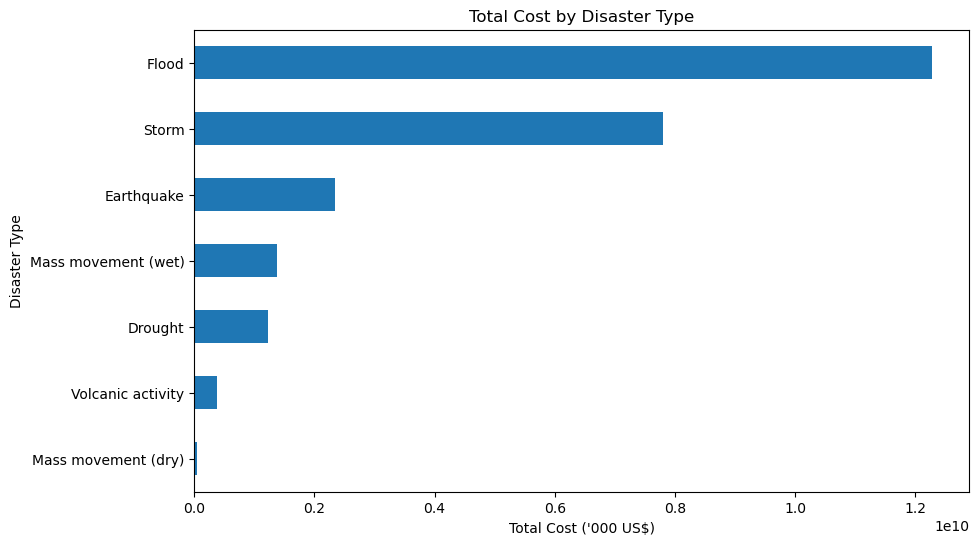

In [14]:
import matplotlib.pyplot as plt

# Example: Create a bar chart of total cost by disaster type
plt.figure(figsize=(10, 6))
total_cost_per_disaster_region.groupby('Disaster Type')['Total Cost'].sum().sort_values().plot(kind='barh')
plt.xlabel('Total Cost (\'000 US$)')
plt.ylabel('Disaster Type')
plt.title('Total Cost by Disaster Type')
plt.show()


In [15]:
import plotly.express as px

# Define the list of selected disaster types
selected_disaster_types = ['Drought', 'Earthquake', 'Flood', 'Mass movement (dry)', 'Mass movement (wet)', 'Storm', 'Volcanic activity']

# Filter the dataset to include only the selected disaster types
selected_data = emdat_df[emdat_df['Disaster Type'].isin(selected_disaster_types)]

# Create an interactive scatter plot of magnitude vs. total cost for selected disaster types
fig = px.scatter(selected_data, x='Magnitude', y='Total Cost', hover_name='Disaster Type', color='Region')
fig.update_layout(title='Magnitude vs. Total Cost for Selected Disaster Types', xaxis_title='Magnitude', yaxis_title='Total Cost (\'000 US$)')
fig.show()
